# TensorFlow Basics

## Customizing your Plots

In [1]:
#[optional] Customizing your plots: https://matplotlib.org/users/customizing.html
#__________________________________________________
import matplotlib
font = {'weight': 'bold',
        'size': 16}
matplotlib.rc('font', **font)

#[for .ipynb only]
#__________________________________________________
%matplotlib inline           
from IPython import display  

## Least Square regression: a start-up example

In [ ]:
#%% e.g. Least Square regression

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

96 -1.980 [-0.02 -0.02 -0.02 -0.02 -0.02]
97 -1.980 [-0.02 -0.02 -0.02 -0.02 -0.02]
98 -1.980 [-0.021 -0.021 -0.021 -0.021 -0.021]
99 -1.980 [-0.021 -0.021 -0.021 -0.021 -0.021]


'\n\n    \n    for step in range(100):\n        sess.run(train_step, feed_dict={x:X, y:Y})\n        #print(step, sess.run(w), sess.run(b)) #You may print loss of each iteration\n        if step%5 == 0:\n            Y_= sess.run(y_, feed_dict={x:X, y:Y})\n\n            plt.gca().cla() \n            plt.scatter(X, Y, label="x")\n            plt.plot(X, Y_, \'b\', label="y")\n            display.display(plt.gcf()) \n            display.clear_output(wait=True)\n            time.sleep(0.2) \n'

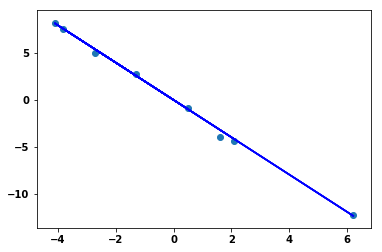

In [27]:
# Data
X = np.array([[2.1],[1.6],[-3.8],[0.5],[-4.1],[-1.3],[-2.7],[6.2]])
Y = np.array([[-4.4],[-3.9],[7.5],[-0.9],[8.1],[2.7],[4.9],[-12.2]])

# Define your Graph
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

b = tf.Variable(tf.zeros([5]))   
w = tf.Variable(tf.zeros([1, 1]))

y_= w * x + b

# Loss & Optimizer
loss = tf.reduce_mean(tf.square(y_ - y))
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(loss)

# Training (you have to start a tf.Session())
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(100):
        Loss, _ = sess.run([loss, train_step], feed_dict={x:X, y:Y})  #evaluate "loss" & training 
        print(step, '%2.3f'%sess.run(w)[0][0], sess.run(b))           #display model params <*1> <*2>
        if step % 5 == 0:
            Y_ = sess.run(y_, feed_dict={x:X, y:Y})
            plt.gca().cla()                                           #for .ipynb display only
            plt.scatter(X, Y, label="x")
            plt.plot(X, Y_, 'b', label="y")
            display.display(plt.gcf())                                #for .ipynb display only
            display.clear_output(wait=True)                           #for .ipynb display only
            time.sleep(0.2)                                           #for .ipynb display only

# An alternative way to work within tf.Session(): "with tf.Session() as sess:"
'''
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
    for step in range(100):
        sess.run(train_step, feed_dict={x:X, y:Y})
        #print(step, sess.run(w), sess.run(b)) #You may print loss of each iteration
        if step%5 == 0:
            Y_= sess.run(y_, feed_dict={x:X, y:Y})

            plt.gca().cla() 
            plt.scatter(X, Y, label="x")
            plt.plot(X, Y_, 'b', label="y")
            display.display(plt.gcf()) 
            display.clear_output(wait=True)
            time.sleep(0.2) 
'''

# <*1>: You can also do: 
#           print(step, w.eval(session=sess), b.eval(session=sess))
#       Ref: http://blog.csdn.net/zcf1784266476/article/details/70259676 
# <*2>: Note that: "sess.run(w)[0][0]" happens when you are evaluating a scalar

## Save and Restore Model

## VAE by TensorFlow

## VAE by Keras

Using TensorFlow backend.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST\t10k-labels-idx1-ubyte.gz
Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 11s - loss: 201.9388 - val_loss: 187.5991
Epoch 2/5
55000/55000 [==============================] - 16s - loss: 182.8503 - val_loss: 178.6048
Epoch 3/5
55000/55000 [==============================] - 16s - loss: 179.3393 - val_loss: 176.9920
Epoch 4/5
55000/55000 [==============================] - 16s - loss: 176.1561 - val_loss: 173.8821
Epoch 5/5
55000/55000 [==============================] - 16s - loss: 173.1118 - val_loss: 171.3586


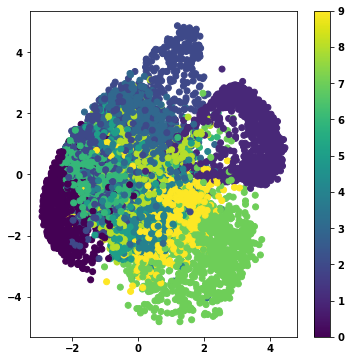

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.regularizers import l2
from keras import backend as K
from keras import objectives
import tensorflow as tf

#%% Load data 
from tensorflow.examples.tutorials.mnist import input_data
#or manually download from: http://yann.lecun.com/exdb/mnist/
mnist = input_data.read_data_sets('MNIST', one_hot=False)
x_train = mnist.train.images
x_test  = mnist.test.images
y_test  = mnist.test.labels

#%% Build VAE

# Specify params
np.random.seed(0)  #for reproducibility
            
dim_x       = 784
dim_latent  = 2 
dim_hidden  = 256
batch_size  = 100 
epochs      = 5
decay       = 1e-4 # L2 regularization
epsilon_std = 1.0
use_loss    = 'xent' # 'mse' or 'xent' = - E_q(log(p)) = - \sum_x q(x) * log(p(x))
use_bias    = True

## Encoder
x = Input(batch_shape=(batch_size, dim_x))

h_encoded = Dense(dim_hidden, 
                  kernel_regularizer=l2(decay), bias_regularizer=l2(decay), 
                  use_bias=use_bias, activation='tanh')(x)
z_mean    = Dense(dim_latent, 
                  kernel_regularizer=l2(decay), bias_regularizer=l2(decay), 
                  use_bias=use_bias)(h_encoded)
#why do we encode "log_var" instead of "var"?  <3*> 
z_log_var = Dense(dim_latent, 
                  kernel_regularizer=l2(decay), bias_regularizer=l2(decay), 
                  use_bias=use_bias)(h_encoded)

## Sampler
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal_variable(shape=(batch_size, dim_latent), mean=0.,
                                       scale=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling, output_shape=(dim_latent,))([z_mean, z_log_var])

## Decoder
decoder_hidden = Dense(dim_hidden, 
                     kernel_regularizer=l2(decay), bias_regularizer=l2(decay), 
                     use_bias=use_bias, activation='tanh')
decoder_output = Dense(dim_x, 
                     kernel_regularizer=l2(decay), bias_regularizer=l2(decay), 
                     use_bias=use_bias, activation='sigmoid')
x_hat          = decoder_output(decoder_hidden(z))

                
## Loss
def loss(x, x_hat):
    loss_kl   = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    loss_xent = dim_x * objectives.binary_crossentropy(x, x_hat)
    loss_mse  = dim_x * objectives.mse(x, x_hat) 
    if use_loss == 'xent':
        return loss_kl + loss_xent
    elif use_loss == 'mse':
        return loss_kl + loss_mse
    else:
        raise Exception('Undefined Loss: %s'%(use_loss))

## Define Model
vae = Model(x, x_hat)
vae.compile(optimizer='rmsprop', loss=loss)

# Train the VAE on MNIST digits
vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

# Build a model to project inputs on the latent space
encoder = Model(x, z_mean)

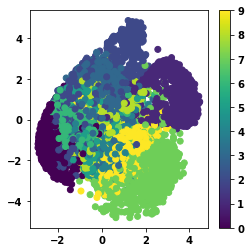

In [36]:
#%% Visualization: Latent Space

# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
fig = plt.figure(figsize=(4, 4))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()
fig.savefig('z_{}.png'.format(use_loss))

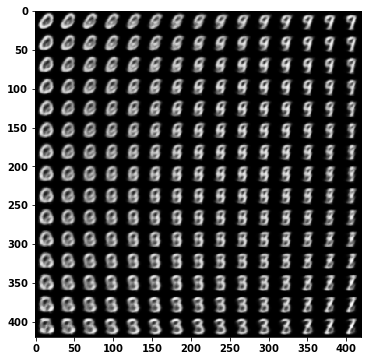

In [33]:
#%% Visualization: 

## build a digit generator that can sample from the learned distribution
z_sampled = Input(shape=(dim_latent,))
x_decoded = decoder_output(decoder_hidden(z_sampled))
generator = Model(z_sampled, x_decoded)


## display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
m = 28
figure = np.zeros((m * n, m * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(m, m)
        figure[i * m: (i + 1) * m,
               j * m: (j + 1) * m] = digit

fig = plt.figure(figsize=(6, 6))
plt.imshow(figure, cmap='Greys_r')
plt.show()
fig.savefig('x_{}.png'.format(use_loss))

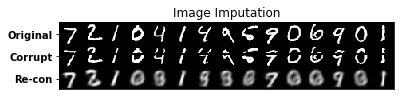

In [40]:
## data imputation
figure = np.zeros((m * 3, m * n))
x = x_test[:batch_size,:]
x_corrupted = np.copy(x)
x_corrupted[:, 300:400] = 0
x_reconstruted = vae.predict(x_corrupted, batch_size=batch_size).reshape((-1, m, m))
x = x.reshape((-1, m, m))
x_corrupted = x_corrupted.reshape((-1, m, m))
for i in range(n):
    figure[:m,      i*m:(i+1)*m] = x[i]
    figure[ m:2*m,  i*m:(i+1)*m] = x_corrupted[i]
    figure[   2*m:, i*m:(i+1)*m] = x_reconstruted[i]

fig = plt.figure(figsize=(6, 2.5))
plt.imshow(figure, cmap='Greys_r')
plt.title('Image Imputation')
plt.xticks([])
plt.yticks(m*np.array([.5,1.5,2.5]),['Original','Corrupt','Re-con'])
fig.savefig('i_{}.png'.format(use_loss))